In [27]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [28]:
audio = '/content/twinkle_15.wav'
ipd.Audio(audio)

In [29]:
org_audio, sr = librosa.load(audio)
ipd.Audio(org_audio, rate=sr)

In [30]:
FRAME_LENGTH = 2048
HOP_LENGTH = 512

In [31]:
ft_audio = librosa.stft(org_audio, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)

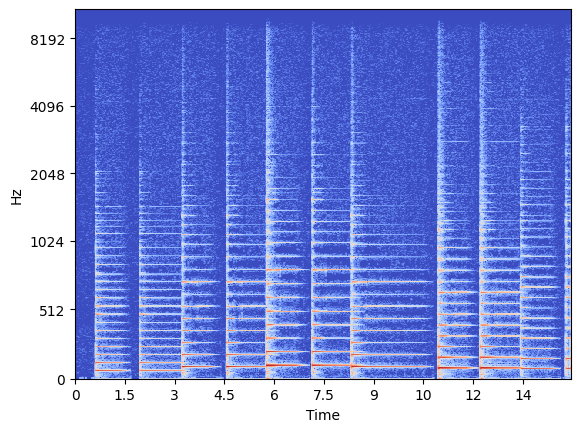

In [32]:
mag_audio = np.abs(ft_audio)
D = librosa.amplitude_to_db(mag_audio)
librosa.display.specshow(D, x_axis='time', y_axis='mel')
plt.show()

In [33]:
angle_audio = np.angle(ft_audio)

In [34]:
epsilon = 1e-10
mag_audio_ep = mag_audio + epsilon

dims = np.shape(mag_audio_ep)
rows = dims[0]
columns = dims[1]

_I = 8

In [35]:
W = np.abs(np.random.normal(loc=0, scale=2.5, size=(rows, _I)))
H = np.abs(np.random.normal(loc=0, scale=2.5, size=(_I, columns)))

In [36]:
MAXITER = 5000

for i in range(MAXITER):
    H *= W.T @ (mag_audio_ep / (W @ H)) / (W.T @ np.ones(dims))
    W *= (mag_audio_ep / (W @ H)) @ H.T / (np.ones(dims) @ H.T)

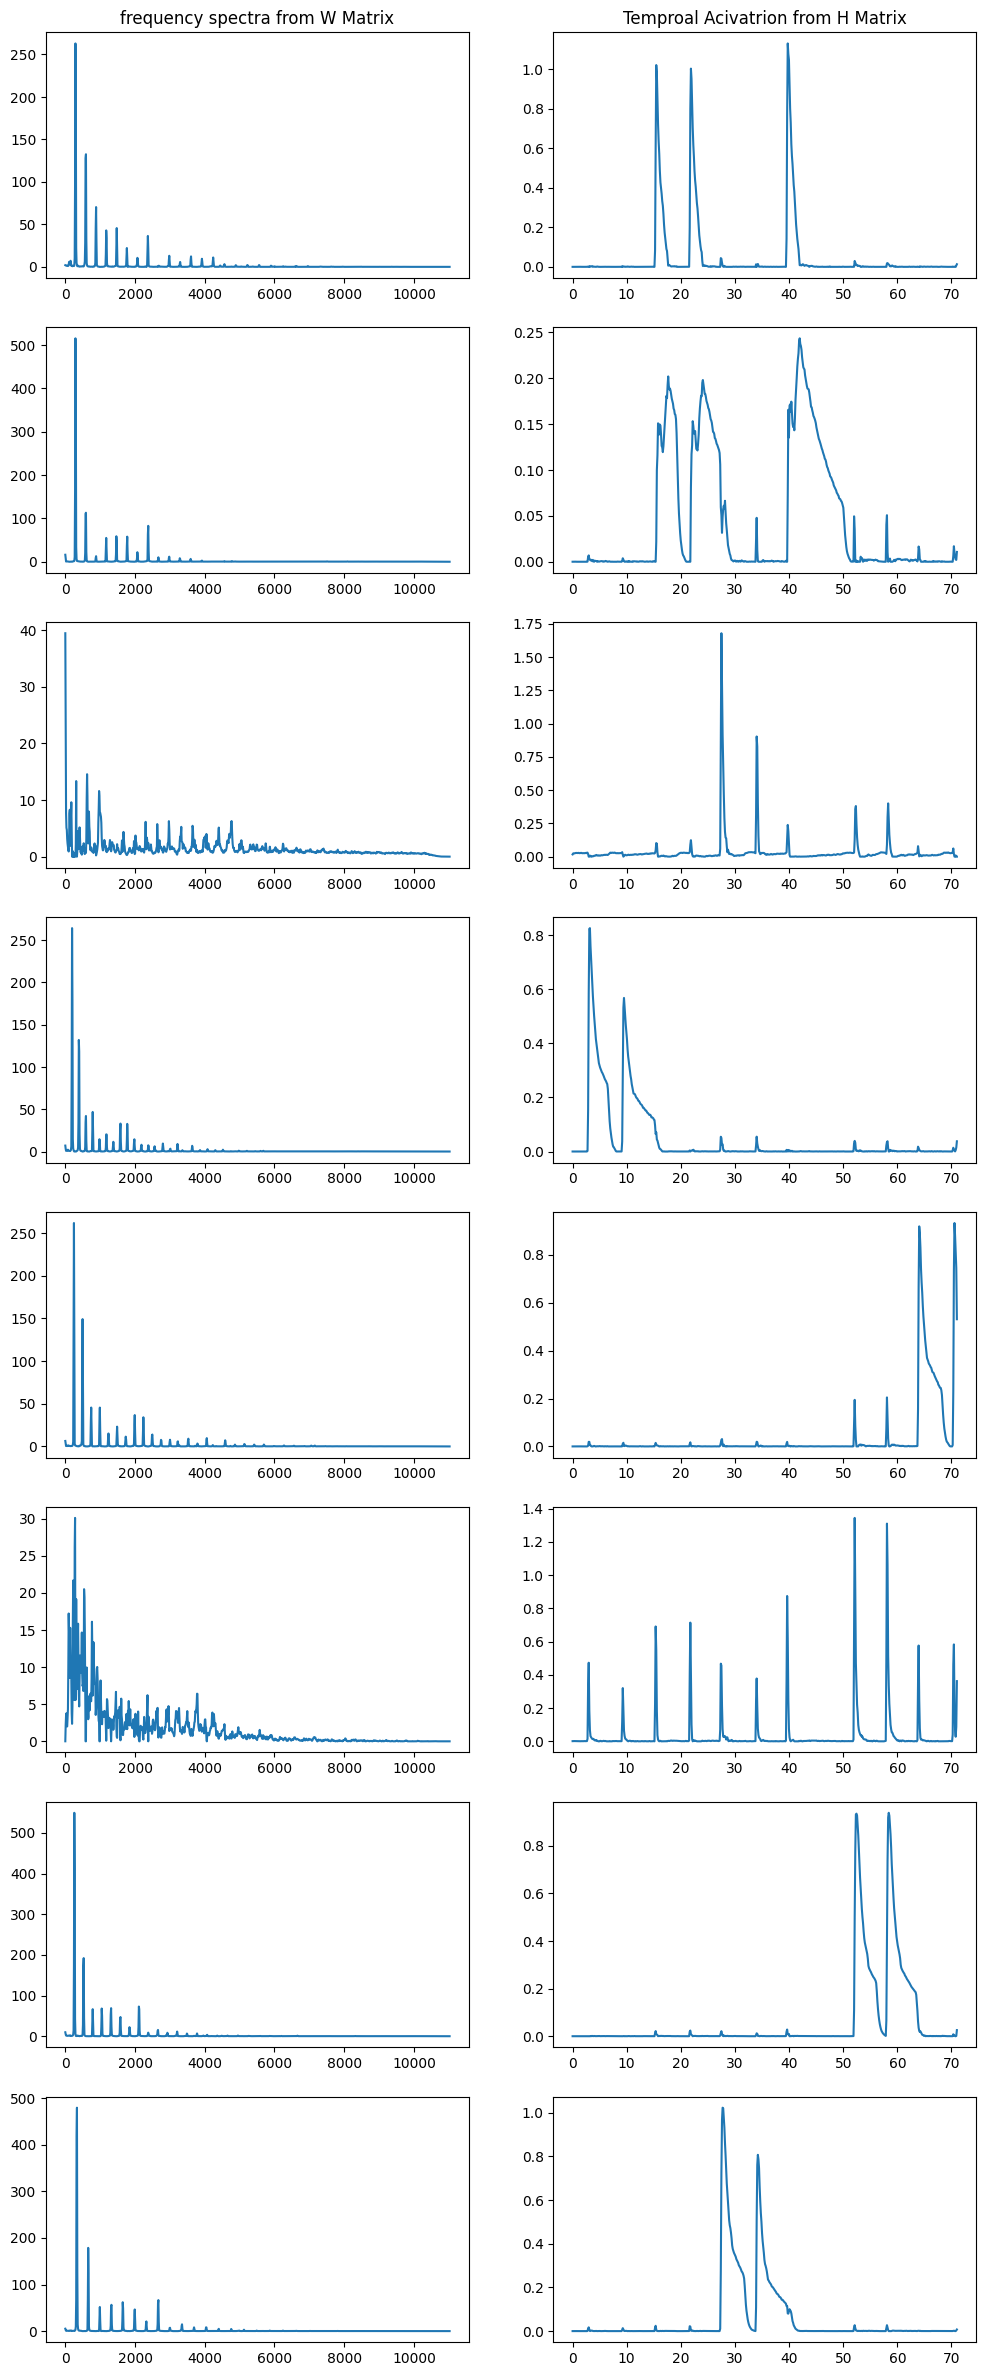

In [37]:
f, ax = plt.subplots(_I, 2, figsize=(12, 30))
ax[0, 0].set_title('frequency spectra from W Matrix')
ax[0, 1].set_title('Temproal Acivatrion from H Matrix')
for row in range(_I):
    ax[row, 0].plot(np.linspace(0, 22050 / 2, rows), W[:, row])
    ax[row, 1].plot(np.linspace(0, 71, columns), H[row])

In [38]:
filters = [0, 1, 3, 4, 5, 6]
filtered = W[:, filters] @ H[filters, :]
reconstruct = filtered * np.exp(1j * angle_audio)

In [39]:
new_sound = librosa.istft(reconstruct, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)

In [40]:
ipd.Audio(org_audio, rate=sr)

In [41]:
ipd.Audio(new_sound, rate=sr)